In [1]:
# !pip install pims
# !pip install imageio
# !pip install imageio-ffmpeg
# !pip install moviepy
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install ffmpeg-normalize==0.5.1

In [2]:
from keras.models import load_model
model=load_model('lane_detector_model_UNet_3+2+2+1+1+1+1+1+1+1epochs_try_sigmoid.h5')

/jet/var/python/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


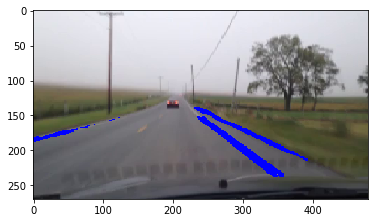

In [46]:
import cv2
import numpy as np
vidcap = cv2.VideoCapture('raw.mp4')
success,image = vidcap.read()
count = 0
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.mp4', fourcc,20,(480,270,3))
while success:
    success,image = vidcap.read()
    temp=cv2.resize(image,dsize=(256,256),interpolation=cv2.INTER_NEAREST)[:,:,::-1]
    temp=temp.astype(np.float32)/255.0
    # Setting red color as a highloghter of the detected lane
    temp[np.where((model.predict(temp[np.newaxis,:,:,:])[0].argmax(axis=2))==0)] = (0, 0, 255)
    temp=cv2.resize(temp,dsize=(480,270),interpolation=cv2.INTER_NEAREST)
    plt.imshow(temp)
    break
#     out.write(temp[:,:,np.newaxis])

vidcap.release()

out.release()